# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

#### Observable Trends

* Temperatures correlate to Latitude.  Temperatures are higher the closer to the Equator you get.  
* Interestingly, the highest temps seem to be around the +20 Latitude line. This could be because of the randon data set pulled.  However I pulled a random list of cities a few time with the same results.  My initial thought is the +20 parralel is more populated, thus more cities and more temperature readings.   
* There is no correlations for humidity, wind speed or cloudiness with relation to latitude.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


# Starting URL for Weather Map API Call
url = 'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=' + weather_api_key

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#Initiate counter for city number below
number = 1

#Lists for holding required items
city_name = []
lat = []
lng = []
temp = []
humid = []
clouds = []
wind = []

#Loop through each city, extract required items, and print result
print('------------------------------')
print('Start of Records')
print('------------------------------')

for city in cities:
    try:
        city_data = (requests.get(url + '&q=' + city)).json()
        city_name.append(city_data['name'])
        lat.append(city_data['coord']['lat'])
        lng.append(city_data['coord']['lon'])
        temp.append(city_data['main']['temp'])
        humid.append(city_data['main']['humidity'])
        clouds.append(city_data['clouds']['all'])
        wind.append(city_data['wind']['speed'])
        print(f'City number {number} of {len(cities)} complete. | Added {city}')
        number = number + 1
    
    except KeyError:
        print(f'Missing data in city number {number} of {len(cities)}. | Skipping {city}')
        number = number + 1
        
print('------------------------------')
print('End of Records')
print('------------------------------')
        

------------------------------
Start of Records
------------------------------
City number 1 of 603 complete. | Added bredasdorp
Missing data in city number 2 of 603. | Skipping taolanaro
City number 3 of 603 complete. | Added brae
City number 4 of 603 complete. | Added san quintin
City number 5 of 603 complete. | Added nioro
City number 6 of 603 complete. | Added daru
Missing data in city number 7 of 603. | Skipping attawapiskat
City number 8 of 603 complete. | Added rikitea
City number 9 of 603 complete. | Added erenhot
City number 10 of 603 complete. | Added chebsara
City number 11 of 603 complete. | Added cape town
City number 12 of 603 complete. | Added port elizabeth
City number 13 of 603 complete. | Added husavik
City number 14 of 603 complete. | Added grindavik
City number 15 of 603 complete. | Added butaritari
City number 16 of 603 complete. | Added nemea
City number 17 of 603 complete. | Added pedreiras
Missing data in city number 18 of 603. | Skipping dzhusaly
City number 19

City number 162 of 603 complete. | Added kavaratti
City number 163 of 603 complete. | Added nizhniy kuranakh
City number 164 of 603 complete. | Added ahuimanu
City number 165 of 603 complete. | Added manzanillo
City number 166 of 603 complete. | Added lavrentiya
City number 167 of 603 complete. | Added rovaniemi
City number 168 of 603 complete. | Added souillac
City number 169 of 603 complete. | Added haselunne
City number 170 of 603 complete. | Added saint-francois
City number 171 of 603 complete. | Added tiksi
City number 172 of 603 complete. | Added iquique
City number 173 of 603 complete. | Added bodden town
City number 174 of 603 complete. | Added esperance
City number 175 of 603 complete. | Added bairnsdale
City number 176 of 603 complete. | Added pundaguitan
Missing data in city number 177 of 603. | Skipping belushya guba
City number 178 of 603 complete. | Added kvarkeno
City number 179 of 603 complete. | Added inhambane
City number 180 of 603 complete. | Added jacareacanga
City

City number 323 of 603 complete. | Added vila franca do campo
City number 324 of 603 complete. | Added jacksonville beach
City number 325 of 603 complete. | Added deputatskiy
City number 326 of 603 complete. | Added lasem
City number 327 of 603 complete. | Added sorland
Missing data in city number 328 of 603. | Skipping senmonorom
City number 329 of 603 complete. | Added baculin
City number 330 of 603 complete. | Added grand-santi
City number 331 of 603 complete. | Added zyryanka
Missing data in city number 332 of 603. | Skipping mrirt
City number 333 of 603 complete. | Added conde
City number 334 of 603 complete. | Added sao luiz gonzaga
City number 335 of 603 complete. | Added constantine
City number 336 of 603 complete. | Added bonavista
City number 337 of 603 complete. | Added te anau
City number 338 of 603 complete. | Added emba
City number 339 of 603 complete. | Added gilgit
City number 340 of 603 complete. | Added guymon
City number 341 of 603 complete. | Added natal
City number

City number 483 of 603 complete. | Added salaya
City number 484 of 603 complete. | Added waingapu
City number 485 of 603 complete. | Added weiser
City number 486 of 603 complete. | Added tura
City number 487 of 603 complete. | Added mabaruma
City number 488 of 603 complete. | Added puerto baquerizo moreno
City number 489 of 603 complete. | Added beloha
City number 490 of 603 complete. | Added iwanai
City number 491 of 603 complete. | Added laguna
Missing data in city number 492 of 603. | Skipping karkaralinsk
City number 493 of 603 complete. | Added ginir
City number 494 of 603 complete. | Added omboue
City number 495 of 603 complete. | Added yar-sale
City number 496 of 603 complete. | Added la sarre
City number 497 of 603 complete. | Added vorontsovka
City number 498 of 603 complete. | Added troitsko-pechorsk
Missing data in city number 499 of 603. | Skipping ruatoria
City number 500 of 603 complete. | Added moree
City number 501 of 603 complete. | Added batagay-alyta
City number 502 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Create a dataframe with required items
city_data_df = pd.DataFrame({'City': city_name,
                            'Latitude': lat,
                            'Longitude': lng,
                            'Temperature': temp,
                            'Humidity': humid,
                            'Cloudiness': clouds,
                            'Wind Speed': wind})

#Save dataframe as csv
pd.DataFrame.to_csv(city_data_df, 'output_data/city_data.csv')

city_data_df.count()

City           560
Latitude       560
Longitude      560
Temperature    560
Humidity       560
Cloudiness     560
Wind Speed     560
dtype: int64

In [5]:
city_data_df.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
0,Bredasdorp,-34.53,20.04,51.80,87,5,12.75
1,Brae,60.40,-1.35,55.40,76,20,10.29
2,San Quintín,30.48,-115.95,68.20,80,0,2.44
3,Nioro,13.35,-15.75,86.11,56,100,6.73
4,Daru,-9.08,143.21,77.49,87,100,17.69


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_max = city_data_df["Humidity"].max()
humidity_max

100

In [7]:
#  Get the indices of cities that have humidity over 100%.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<Figure size 432x288 with 0 Axes>

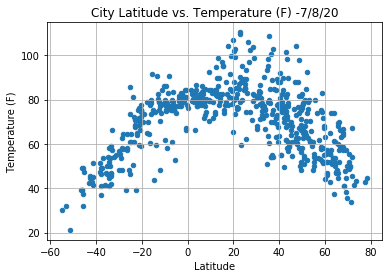

In [10]:
#Plot latitude vs temperature and save as .png

plt.figure()
city_data_df.plot(x="Latitude", y="Temperature", kind = "scatter", marker="o")

plt.title("City Latitude vs. Temperature (F) -7/8/20")
#plt.xlim(-80, 100)
#plt.ylim(0, 140)
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.grid(True)
plt.savefig("figures/lat_temp_plot.png")
plt.show()

This Scatter Plot has points that show the relationship between two sets of data, City Latitude and Humidity  The code is pulling both latitude and temperature values from the City Data dataframe we created of random cities.  We are looking for correlation between the data.  There are three types of correlation: positive, negative, and none (no correlation).

## Latitude vs. Humidity Plot

<Figure size 432x288 with 0 Axes>

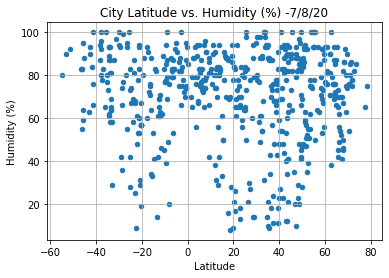

In [11]:
#Plot latitude vs humidity and save as .png

plt.figure()
city_data_df.plot(x="Latitude", y="Humidity", kind = "scatter", marker="o")

plt.title("City Latitude vs. Humidity (%) -7/8/20")
#plt.xlim(-80, 100)
#plt.ylim(-10, 110)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.savefig("figures/lat_humid_plot.png")
plt.show()

This Scatter Plot has points that show the relationship between two sets of data, City Latitude and Humidity  The code is pulling both latitude and humidity values from the City Data dataframe we created of random cities. We are looking for correlation between the data.  There are three types of correlation: positive, negative, and none (no correlation).

## Latitude vs. Cloudiness Plot

<Figure size 432x288 with 0 Axes>

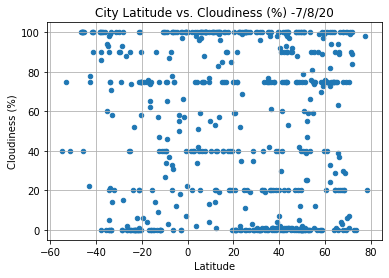

In [12]:
#Plot latitude vs cloudiness and save as .png

plt.figure()
city_data_df.plot(x="Latitude", y="Cloudiness", kind = "scatter", marker="o")

plt.title("City Latitude vs. Cloudiness (%) -7/8/20")
#plt.xlim(-80, 100)
#plt.ylim(-10, 110)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.savefig("figures/lat_cloud_plot.png")
plt.show()

This Scatter Plot has points that show the relationship between two sets of data, City Latitude and Humidity  The code is pulling both latitude and cloudiness values from the City Data dataframe we created of random cities.
We are looking for correlation between the data.  There are three types of correlation: positive, negative, and none (no correlation).

## Latitude vs. Wind Speed Plot

<Figure size 432x288 with 0 Axes>

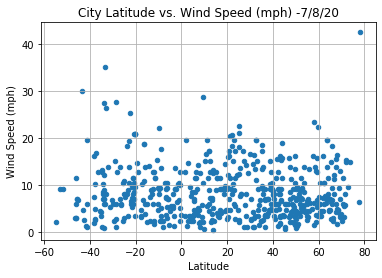

In [26]:
#Plot latitude vs wind speed and save as .png

plt.figure()
city_data_df.plot(x="Latitude", y="Wind Speed", kind = "scatter", marker="o")

plt.title("City Latitude vs. Wind Speed (mph) -7/8/20")
#plt.xlim(-80, 100)
#plt.ylim(-10, 40)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.savefig("figures/lat_wind_plot.png")
plt.show()

This Scatter Plot has points that show the relationship between two sets of data, City Latitude and Humidity  The code is pulling both latitude and wind speed values from the City Data dataframe we created of random cities.   We are looking for correlation between the data.  There are three types of correlation: positive, negative, and none (no correlation).

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi = city_data_df.loc[city_data_df["Latitude"] >= 0.0]
#northern_hemi.reset_index(inplace=True)

southern_hemi = city_data_df.loc[city_data_df["Latitude"] < 0.0]
#southern_hemi.reset_index(inplace=True)

In [16]:
northern_hemi.head()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
1,Brae,60.40,-1.35,55.40,76,20,10.29
2,San Quintín,30.48,-115.95,68.20,80,0,2.44
3,Nioro,13.35,-15.75,86.11,56,100,6.73
6,Erenhot,43.65,111.98,78.58,41,100,15.28
7,Chebsara,59.20,38.84,71.60,73,75,15.66


In [17]:
southern_hemi.tail()

,City,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed
543,Coolum Beach,-26.53,153.10,58.01,95,2,5.68
545,Alofi,-19.06,-169.92,73.40,88,75,12.75
546,Mildura,-34.20,142.15,41.00,93,0,8.37
547,San Jerónimo,-11.95,-75.28,48.24,63,0,1.63
550,Samarai,-10.62,150.67,77.76,89,100,15.19


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

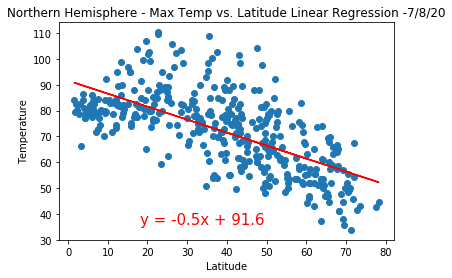

The r-squared is: -0.66255558307557


In [18]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")

plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression -7/8/20')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.savefig("figures/North_Temp_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

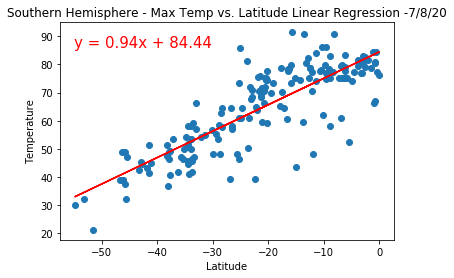

The r-squared is: 0.8339437486245985


In [19]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,86),fontsize=15,color="red")

plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression -7/8/20')
plt.xlabel('Latitude')
plt.ylabel('Temperature')

plt.savefig("figures/South_Temp_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

We use a linear relationship to predict the (average) numerical value of Max Temp for a given value of Latitude using a straight line (called the regression line). Knowing the the slope and the y-intercept of that regression line, we can plug in a value for Latitude and predict the average Max Temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

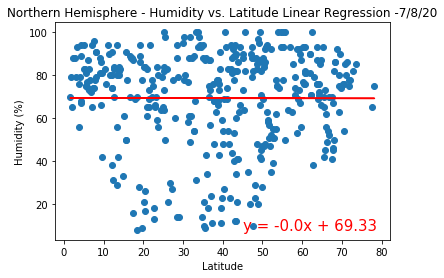

The r-squared is: -0.0011411906892559395


In [20]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,8),fontsize=15,color="red")

plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression -7/8/20')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("figures/North_Humid_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

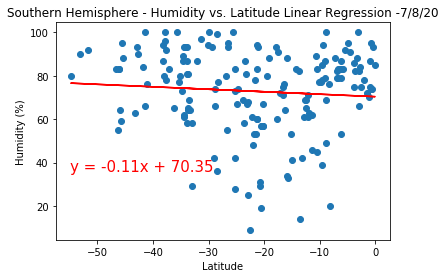

The r-squared is: -0.07930831341633614


In [21]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,36),fontsize=15,color="red")

plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression -7/8/20')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

plt.savefig("figures/South_Humid_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

We use a linear relationship to predict the (average) numerical value of Humidity for a given value of Latitude using a straight line (called the regression line). Knowing the the slope and the y-intercept of that regression line, we can plug in a value for Latitude and predict the average Humidity.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

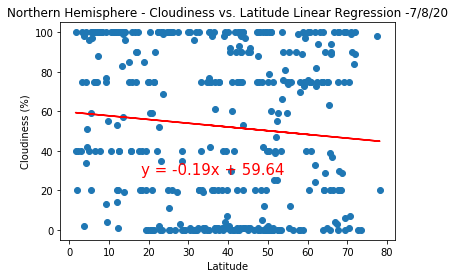

The r-squared is: -0.09484505695906664


In [22]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(18,28),fontsize=15,color="red")

plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression -7/8/20')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("figures/North_Cloud_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

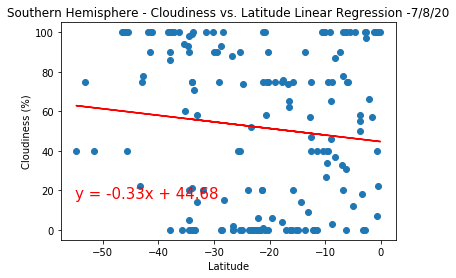

The r-squared is: -0.11283489958006877


In [23]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,16),fontsize=15,color="red")

plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression -7/8/20')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("figures/South_Cloud_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

We use a linear relationship to predict the (average) numerical value of Cloudiness for a given value of Latitude using a straight line (called the regression line). Knowing the the slope and the y-intercept of that regression line, we can plug in a value for Latitude and predict the average Cloudiness. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

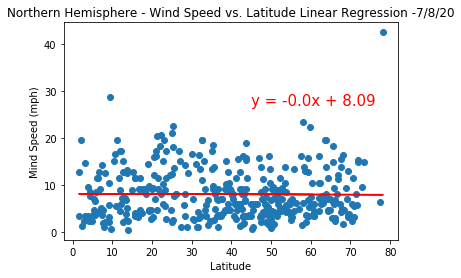

The r-squared is: -0.009341914745170049


In [24]:
x_values = northern_hemi["Latitude"]
y_values = northern_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,27),fontsize=15,color="red")

plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression -7/8/20')
plt.xlabel('Latitude')
plt.ylabel('Mind Speed (mph)')

plt.savefig("figures/North_Wind_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

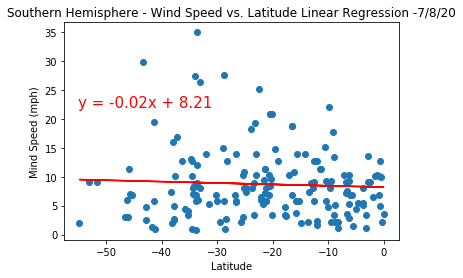

The r-squared is: -0.053291584585829825


In [25]:
x_values = southern_hemi["Latitude"]
y_values = southern_hemi["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,22),fontsize=15,color="red")

plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression -7/8/20')
plt.xlabel('Latitude')
plt.ylabel('Mind Speed (mph)')

plt.savefig("figures/South_Wind_Lat_LinearReg.png")
plt.show()
print(f"The r-squared is: {rvalue}")

We use a linear relationship to predict the (average) numerical value of Wind Speed for a given value of Latitude using a straight line (called the regression line). Knowing the the slope and the y-intercept of that regression line, we can plug in a value for Latitude and predict the average Wind Speed. 